# Urban Informatics for Smart, Sustainable Cities
## Assignment 1
### By Kaylyn Levine (kal573)

#### Import necessary packages

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import geopandas as gp
from geopandas import GeoDataFrame
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Wrangling and Cleaning

#### Import Census Data:
Population, Housing Units, Area, and Density: 2000 - United States -- County by State; and for Puerto Rico

Census 2000 Summary File 1 (SF 1) 100-Percent Data

American Factfinder

In [2]:
data = pd.read_csv("/Users/kaylynlevine/Desktop/Assignment1/census_data_new.csv")
data.head()

,GEO.id,GEO.id2,GEO.display-label,GCT_STUB.target-geo-id,GCT_STUB.target-geo-id2,GCT_STUB.display-label,GCT_STUB.display-label.1,pop,den
0,0100000US,NaN,United States,0500000US01001,1001,United States - Alabama - Autauga County,Autauga County,43671,73.3
1,0100000US,NaN,United States,0500000US01003,1003,United States - Alabama - Baldwin County,Baldwin County,140415,88.0
2,0100000US,NaN,United States,0500000US01005,1005,United States - Alabama - Barbour County,Barbour County,29038,32.8
3,0100000US,NaN,United States,0500000US01007,1007,United States - Alabama - Bibb County,Bibb County,20826,33.4
4,0100000US,NaN,United States,0500000US01009,1009,United States - Alabama - Blount County,Blount County,51024,79.0


In [3]:
len(data)

3141

#### Define city as county with population greater than 100,000 people as of 2000

In [4]:
city = data[data["pop"] > 100000]
city.head()

,GEO.id,GEO.id2,GEO.display-label,GCT_STUB.target-geo-id,GCT_STUB.target-geo-id2,GCT_STUB.display-label,GCT_STUB.display-label.1,pop,den
1,0100000US,NaN,United States,0500000US01003,1003,United States - Alabama - Baldwin County,Baldwin County,140415,88.0
7,0100000US,NaN,United States,0500000US01015,1015,United States - Alabama - Calhoun County,Calhoun County,112249,184.5
27,0100000US,NaN,United States,0500000US01055,1055,United States - Alabama - Etowah County,Etowah County,103459,193.4
36,0100000US,NaN,United States,0500000US01073,1073,United States - Alabama - Jefferson County,Jefferson County,662047,595.0
40,0100000US,NaN,United States,0500000US01081,1081,United States - Alabama - Lee County,Lee County,115092,189.1


In [5]:
len(city)

524

In [6]:
city=city.rename(columns = {'GCT_STUB.target-geo-id2':'FIPS'})
city=city.rename(columns = {'GCT_STUB.display-label.1':'County_Name'})
city.head()

,GEO.id,GEO.id2,GEO.display-label,GCT_STUB.target-geo-id,FIPS,GCT_STUB.display-label,County_Name,pop,den
1,0100000US,NaN,United States,0500000US01003,1003,United States - Alabama - Baldwin County,Baldwin County,140415,88.0
7,0100000US,NaN,United States,0500000US01015,1015,United States - Alabama - Calhoun County,Calhoun County,112249,184.5
27,0100000US,NaN,United States,0500000US01055,1055,United States - Alabama - Etowah County,Etowah County,103459,193.4
36,0100000US,NaN,United States,0500000US01073,1073,United States - Alabama - Jefferson County,Jefferson County,662047,595.0
40,0100000US,NaN,United States,0500000US01081,1081,United States - Alabama - Lee County,Lee County,115092,189.1


#### Import Carbon Emissions Data:
Retrieved from http://vulcan.project.asu.edu/

Total sector annual data from 2002

In [7]:
carbon = pd.read_csv("/Users/kaylynlevine/Desktop/Assignment1/carbon.csv")
carbon.head()

,County,FIPS,Total,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad
0,Autauga,1001,0.256167,0.003001,0.004434,0.010148,0.155508,0.074761,0.0,0.000976,0.002453,0.004886
1,Baldwin,1003,0.450031,0.015348,0.011884,0.031948,0.000000,0.278709,0.0,0.017842,0.044849,0.049451
2,Barbour,1005,0.099370,0.001905,0.008555,0.006284,0.000000,0.057143,0.0,0.005469,0.013747,0.006268
3,Bibb,1007,0.045945,0.000769,0.001622,0.004614,0.000000,0.035746,0.0,0.000380,0.000956,0.001858
4,Blount,1009,0.114776,0.001951,0.009059,0.011162,0.000000,0.087401,0.0,0.000298,0.000749,0.004155


In [8]:
carbon.columns

Index([u' County', u' FIPS', u' Total', u'Commercial', u'Industrial',
       u'Residential', u'Electricity Prod', u'Onroad', u'Cement', u'Aircraft',
       u'Airborne', u'Nonroad'],
      dtype='object')

In [9]:
carbon = carbon.rename(columns = {' FIPS':'FIPS'})
carbon = carbon.rename(columns = {' Total':'Total'})
carbon = carbon.rename(columns = {' County':'County'})
carbon.head()

,County,FIPS,Total,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad
0,Autauga,1001,0.256167,0.003001,0.004434,0.010148,0.155508,0.074761,0.0,0.000976,0.002453,0.004886
1,Baldwin,1003,0.450031,0.015348,0.011884,0.031948,0.000000,0.278709,0.0,0.017842,0.044849,0.049451
2,Barbour,1005,0.099370,0.001905,0.008555,0.006284,0.000000,0.057143,0.0,0.005469,0.013747,0.006268
3,Bibb,1007,0.045945,0.000769,0.001622,0.004614,0.000000,0.035746,0.0,0.000380,0.000956,0.001858
4,Blount,1009,0.114776,0.001951,0.009059,0.011162,0.000000,0.087401,0.0,0.000298,0.000749,0.004155


#### Merge cities (counties) with carbon emissions data for anlaysis

In [10]:
merge = pd.merge(carbon, city, how="inner", on = "FIPS")
merge.head()

,County,FIPS,Total,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad,GEO.id,GEO.id2,GEO.display-label,GCT_STUB.target-geo-id,GCT_STUB.display-label,County_Name,pop,den
0,Baldwin,1003,0.450031,0.015348,0.011884,0.031948,0.000000,0.278709,0.000000,0.017842,0.044849,0.049451,0100000US,NaN,United States,0500000US01003,United States - Alabama - Baldwin County,Baldwin County,140415,88.0
1,Calhoun,1015,0.466963,0.012577,0.046281,0.027428,0.000000,0.347099,0.000000,0.005050,0.012695,0.015834,0100000US,NaN,United States,0500000US01015,United States - Alabama - Calhoun County,Calhoun County,112249,184.5
2,Etowah,1055,0.422520,0.010793,0.016143,0.024343,0.183977,0.168523,0.000000,0.002799,0.007036,0.008906,0100000US,NaN,United States,0500000US01055,United States - Alabama - Etowah County,Etowah County,103459,193.4
3,Jefferson,1073,7.520750,0.160658,0.921725,0.154653,4.864684,1.108491,0.083061,0.037975,0.095457,0.094045,0100000US,NaN,United States,0500000US01073,United States - Alabama - Jefferson County,Jefferson County,662047,595.0
4,Lee,1081,0.416118,0.010120,0.026766,0.024028,0.160853,0.153387,0.000000,0.007098,0.017842,0.016024,0100000US,NaN,United States,0500000US01081,United States - Alabama - Lee County,Lee County,115092,189.1


In [11]:
# drop unneeded columns
merge = merge.loc[:,["County", "FIPS", "Total", "pop", "den"]]
merge.head()

,County,FIPS,Total,pop,den
0,Baldwin,1003,0.450031,140415,88.0
1,Calhoun,1015,0.466963,112249,184.5
2,Etowah,1055,0.422520,103459,193.4
3,Jefferson,1073,7.520750,662047,595.0
4,Lee,1081,0.416118,115092,189.1


#### Normalize carbon emissions by population size and by population density

In [12]:
# first multiply total by 1000000 because recorded in millions of tons
merge['norm_pop'] = merge["Total"] * 1000000 / merge["pop"]
merge['norm_den'] = merge["Total"] * 1000000 / merge["den"]
merge.head()

,County,FIPS,Total,pop,den,norm_pop,norm_den
0,Baldwin,1003,0.450031,140415,88.0,3.205008,5113.991614
1,Calhoun,1015,0.466963,112249,184.5,4.160062,2530.963789
2,Etowah,1055,0.422520,103459,193.4,4.083936,2184.694514
3,Jefferson,1073,7.520750,662047,595.0,11.359844,12639.916674
4,Lee,1081,0.416118,115092,189.1,3.615523,2200.517118


### Data Analysis and Plots

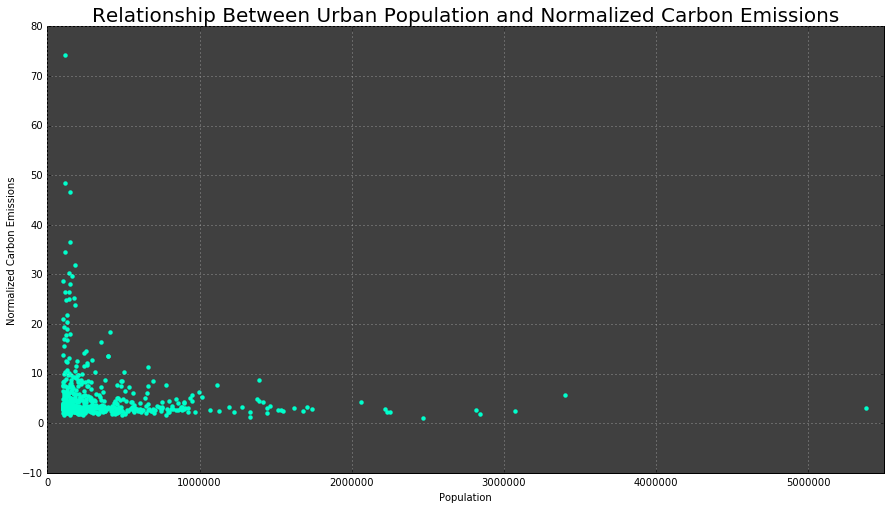

In [13]:
# exploratory scatterplots
ax = merge.plot(x = 'pop', y = 'norm_pop', kind = 'scatter', lw=0, figsize = (15,8), color = '#00ffcc')
ax.set_axis_bgcolor("#404040")
pl.ylabel('Normalized Carbon Emissions')
pl.xlabel('Population')
pl.grid(color = '#e6e6e6')
pl.xlim(0, 5500000)
pl.title("Relationship Between Urban Population and Normalized Carbon Emissions", fontsize = 20)

In [14]:
# linear regression model using statsmodels
X1 = sm.add_constant(merge['pop'])
linmodel = sm.OLS(merge['norm_pop'], X1).fit()

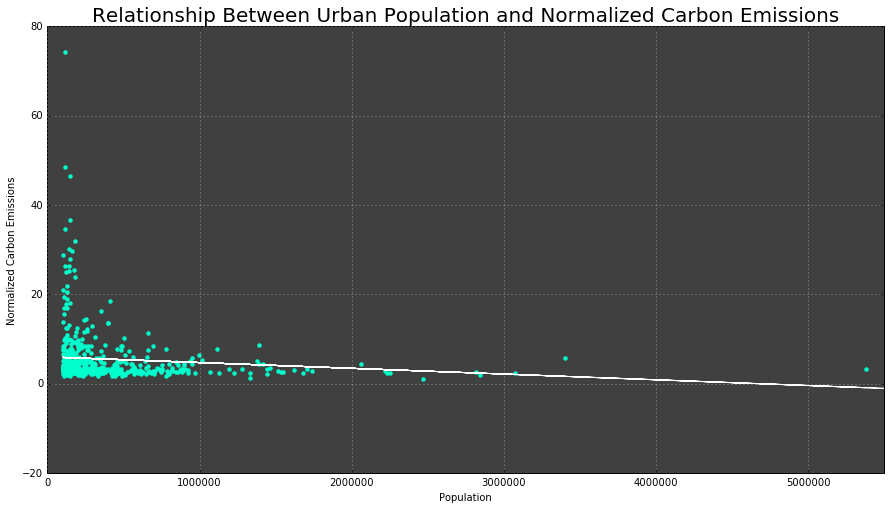

In [15]:
ax = merge.plot(x = 'pop', y = 'norm_pop', kind = 'scatter', lw=0, figsize = (15,8), color = '#00ffcc')
pl.plot(merge['pop'], linmodel.predict(), color = 'white', lw = 1)
ax.set_axis_bgcolor("#404040")
pl.ylabel('Normalized Carbon Emissions')
pl.xlabel('Population')
pl.grid(color = '#e6e6e6')
pl.xlim(0, 5500000)
pl.title("Relationship Between Urban Population and Normalized Carbon Emissions", fontsize = 20)

In [16]:
#fit second degree polynomial to data to highlight trend
# first define line function
def line(x, pars, err=False):
    '''
    Function that created a line given an independent variable and parameters 
    Arguments:
    x: series of IV values
    pars: series of 2 numbers : slope and intercept
    Return:
     array of DV values
    '''
    if err:
        err = np.random.randn(len(x)) * err
    else:
        err = np.zeros_like(x)
    return pars[0] * x + pars[1] + err, err

In [17]:
# set parameters to data
x = merge['pop']
y = merge['norm_pop']
xyd = pd.DataFrame()
xyd['X'] = x
xyd['y'] = y
xyd['X2'] = x*x

cres = smf.ols(formula = 'y ~ X2 + X', data=xyd).fit()

In [18]:
# create data frame for this model
xyd2 = pd.DataFrame()
xyd2['X'] = np.linspace(x.min(), x.max(), 100)
xyd2['X2'] = xyd2['X'] * xyd2['X']

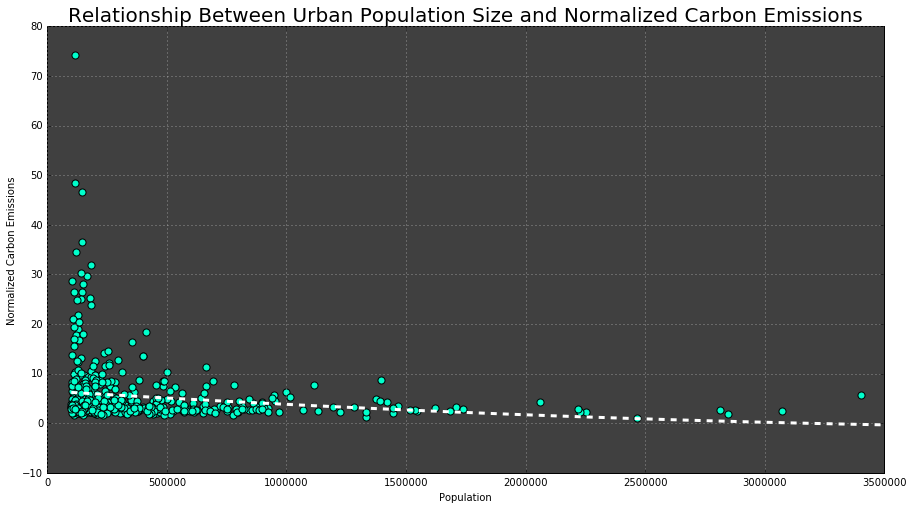

In [19]:
ax = merge.plot(x = 'pop', y = 'norm_pop', kind = 'scatter', lw=0, figsize = (15,8), color = '#00ffcc')
pl.scatter(merge['pop'], merge['norm_pop'], s=50, facecolors='#00ffcc')
curve = pl.plot(xyd2['X'], cres.predict(xyd2), '--', color = 'white', lw = 3)
ax.set_axis_bgcolor("#404040")
pl.ylabel('Normalized Carbon Emissions')
pl.xlabel('Population')
pl.grid(color = '#e6e6e6')
pl.xlim(0, 3500000)
pl.title("Relationship Between Urban Population Size and Normalized Carbon Emissions", fontsize = 20)

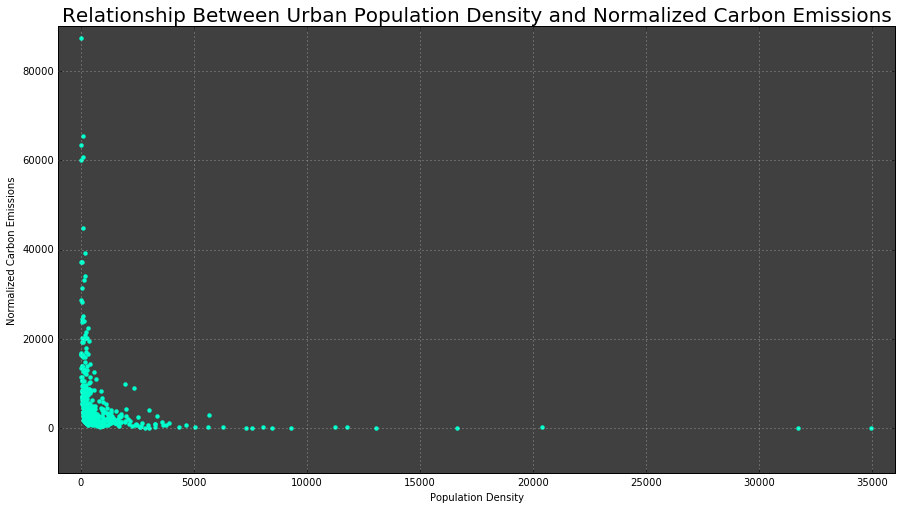

In [20]:
# exploratory scatterplots
ax = merge.plot(x = 'den', y = 'norm_den', kind = 'scatter', lw=0, figsize = (15,8), color = '#00ffcc')
ax.set_axis_bgcolor("#404040")
pl.ylabel('Normalized Carbon Emissions')
pl.xlabel('Population Density')
pl.grid(color = '#e6e6e6')
pl.xlim(-1000, 36000)
pl.ylim(-10000, 90000)
pl.title("Relationship Between Urban Population Density and Normalized Carbon Emissions", fontsize = 20)

In [21]:
# linear regression model using statsmodels
X2 = sm.add_constant(merge['den'])
linmodel2 = sm.OLS(merge['norm_den'], X2).fit()

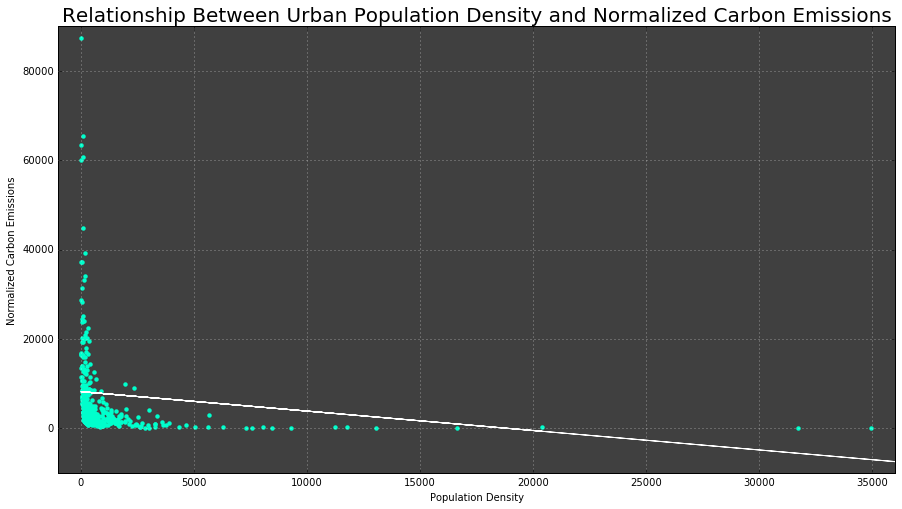

In [22]:
ax = merge.plot(x = 'den', y = 'norm_den', kind = 'scatter', lw=0, figsize = (15,8), color = '#00ffcc')
pl.plot(merge['den'], linmodel2.predict(), color = 'white', lw = 1)
ax.set_axis_bgcolor("#404040")
pl.ylabel('Normalized Carbon Emissions')
pl.xlabel('Population Density')
pl.grid(color = '#e6e6e6')
pl.xlim(-1000, 36000)
pl.ylim(-10000, 90000)
pl.title("Relationship Between Urban Population Density and Normalized Carbon Emissions", fontsize = 20)

In [23]:
# set parameters to data
x2 = merge['den']
y2 = merge['norm_den']
xyd2 = pd.DataFrame()
xyd2['X2'] = x2
xyd2['y2'] = y2
xyd2['X22'] = x2*x2

cres2 = smf.ols(formula = 'y2 ~ X22 + X2', data=xyd2).fit()

In [24]:
# create data frame for this model
xyd22 = pd.DataFrame()
xyd22['X2'] = np.linspace(x2.min(), x2.max(), 100)
xyd22['X22'] = xyd22['X2'] * xyd22['X2']

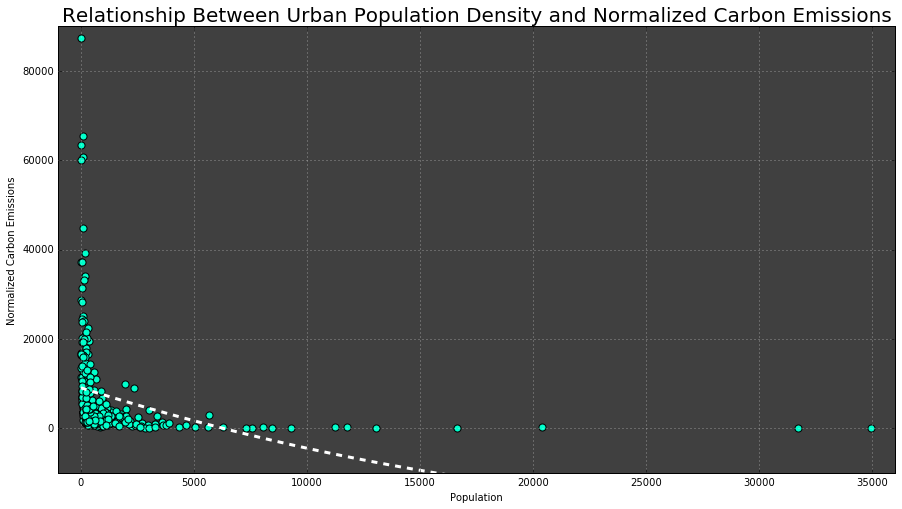

In [25]:
ax = merge.plot(x = 'den', y = 'norm_den', kind = 'scatter', lw=0, figsize = (15,8), color = '#00ffcc')
pl.scatter(merge['den'], merge['norm_den'], s=50, facecolors='#00ffcc')
curve = pl.plot(xyd22['X2'], cres2.predict(xyd22), '--', color = 'white', lw = 3)
ax.set_axis_bgcolor("#404040")
pl.ylabel('Normalized Carbon Emissions')
pl.xlabel('Population')
pl.grid(color = '#e6e6e6')
pl.xlim(-1000, 36000)
pl.ylim(-10000, 90000)
pl.title("Relationship Between Urban Population Density and Normalized Carbon Emissions", fontsize = 20)

#### Pearson Correlation:
This test returned a correlation coefficient very close to zero for both sets of variables, implying that the two distributions are extremely dissimilar.

The population size and the normalized carbon emissions are not correlated.

The population density and the normalized carbon emissions are not correlated.

In [26]:
# pearson correlation (bivariate correlation analysis) for population size
pearson = scipy.stats.pearsonr(merge['pop'], merge['norm_pop'])
print(pearson)

(-0.12651480782421229, 0.0037220627411162846)


In [27]:
# pearson correlation (bivariate correlation analysis) for population density
pearson = scipy.stats.pearsonr(merge['den'], merge['norm_den'])
print(pearson)

(-0.038928461930623694, 0.37382990747319911)


In [28]:
rank_pop = merge.sort('norm_pop', ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [29]:
rank_pop.head(n = 10)

,County,FIPS,Total,pop,den,norm_pop,norm_den
294,San Juan,35045,8.453822,113801,20.6,74.286004,410379.686845
13,Coconino,4005,5.632171,116320,6.2,48.419627,908414.684839
164,Porter,18127,6.829558,146798,351.1,46.523507,19451.887650
232,Monroe,26115,5.346132,145945,264.8,36.631145,20189.321752
87,Citrus,12017,4.077883,118085,202.3,34.533452,20157.600786
183,Calcasieu,22019,5.848485,183577,171.4,31.858486,34121.851499
423,Berkeley,45015,4.307215,142651,130.0,30.194073,33132.420623
237,St. Clair,26147,4.866322,164235,226.7,29.630236,21465.909951
174,Woodbury,19193,2.986623,103877,119.0,28.751529,25097.669059
188,Ouachita,22073,4.119479,147250,241.2,27.976086,17079.099175


In [30]:
rank_den = merge.sort('norm_den', ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [31]:
rank_den.head(n = 10)

,County,FIPS,Total,pop,den,norm_pop,norm_den
13,Coconino,4005,5.632171,116320,6.2,48.419627,908414.684839
294,San Juan,35045,8.453822,113801,20.6,74.286004,410379.686845
15,Mohave,4015,1.012747,155032,11.6,6.532506,87305.813017
43,San Bernardino,6071,5.584881,1709434,85.2,3.267093,65550.241984
12,Cochise,4003,1.209644,117755,19.1,10.272551,63332.156754
31,Kern,6029,4.937148,661645,81.3,7.461929,60727.526433
245,St. Louis,27137,1.931689,200528,32.2,9.633012,59990.328789
37,Monterey,6053,5.424930,401762,120.9,13.502845,44871.214648
266,Clark,32003,6.828896,1375765,173.9,4.963708,39269.096849
69,Weld,8123,1.690290,180936,45.3,9.341923,37313.248013


In [32]:
large = merge[merge['pop'] >= 2000000]

In [33]:
rank_large = large.sort('norm_pop', ascending=False)
rank_large.head(n = 10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,County,FIPS,Total,pop,den,norm_pop,norm_den
461,Harris,48201,19.419976,3400578,1967.0,5.710787,9872.890625
239,Wayne,26163,8.888368,2061162,3356.1,4.312309,2648.421592
136,Cook,17031,16.972333,5376741,5685.6,3.156621,2985.143728
452,Dallas,48113,6.366917,2218899,2522.6,2.869404,2523.950442
44,San Diego,6073,7.446142,2813833,670.0,2.646263,11113.644304
14,Maricopa,4013,7.481091,3072149,333.8,2.435133,22411.896651
101,Miami-Dade,12086,5.129586,2253362,1157.9,2.276415,4430.077160
313,Queens,36081,5.011067,2229379,20409.0,2.247741,245.532197
33,Los Angeles,6037,21.316004,9519338,2344.2,2.239232,9093.082489
39,Orange,6059,5.329271,2846289,3605.6,1.872358,1478.053879


In [34]:
dense = merge[merge['den'] >= 8000]

In [35]:
rank_dense = dense.sort('norm_den', ascending=False)
rank_dense.head(n = 10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,County,FIPS,Total,pop,den,norm_pop,norm_den
412,Philadelphia,42101,4.153893,1517550,11233.6,2.737236,369.773998
313,Queens,36081,5.011067,2229379,20409.0,2.247741,245.532197
208,Baltimore City,24510,1.377024,651154,8058.4,2.114744,170.880540
218,Suffolk,25025,1.752133,689807,11788.4,2.540033,148.631935
280,Hudson,34017,1.779753,608975,13043.6,2.922539,136.446470
81,District of Columbia,11001,1.260173,572059,9316.4,2.202872,135.263946
491,Alexandria,51510,0.944493,128283,8452.0,7.362574,111.747881
45,San Francisco,6075,1.350511,776733,16634.4,1.738707,81.187830
303,Kings,36047,2.762536,2465326,34916.6,1.120556,79.118116
306,New York,36061,3.989600,1537195,66940.1,2.595377,59.599558


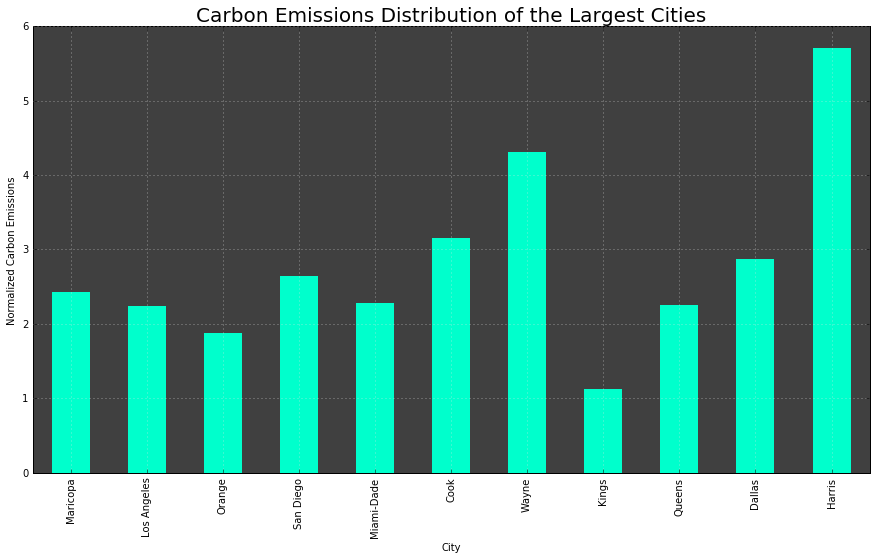

In [36]:
ax = large.plot(x = 'County', y = 'norm_pop', kind = 'bar', lw=0, figsize = (15,8), color = '#00ffcc', legend = None)
ax.set_axis_bgcolor("#404040")
pl.ylabel('Normalized Carbon Emissions')
pl.xlabel('City')
pl.grid(color = '#e6e6e6')
pl.title("Carbon Emissions Distribution of the Largest Cities", fontsize = 20)

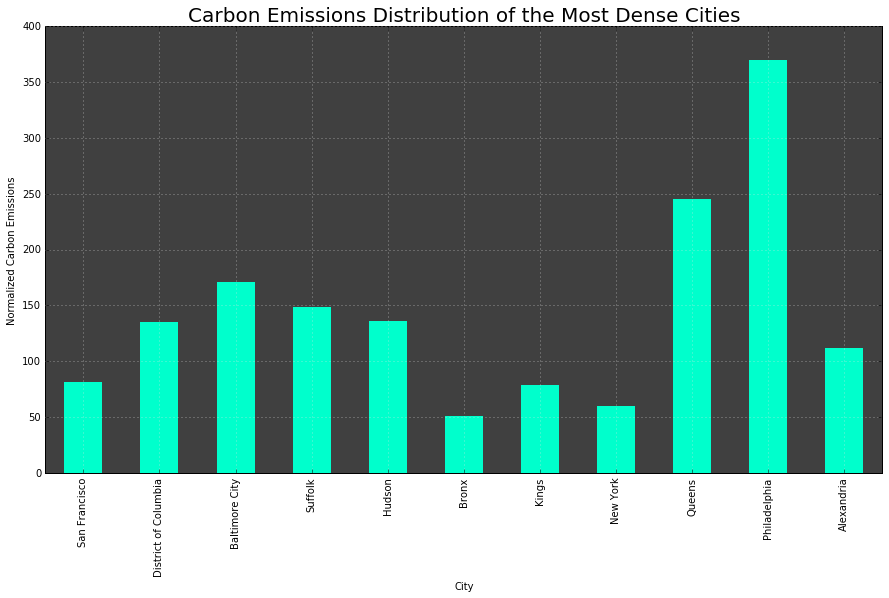

In [37]:
ax = dense.plot(x = 'County', y = 'norm_den', kind = 'bar', lw=0, figsize = (15,8), color = '#00ffcc', legend = None)
ax.set_axis_bgcolor("#404040")
pl.ylabel('Normalized Carbon Emissions')
pl.xlabel('City')
pl.grid(color = '#e6e6e6')
pl.title("Carbon Emissions Distribution of the Most Dense Cities", fontsize = 20)